# Function for Plotting

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from opfunu import cec_based
from ipywidgets import interact

In [11]:
def Plot_Min50Max(Dataset_Results):
    plot = sns.scatterplot(Dataset_Results.describe().loc[['min','50%','max']].T)
    plot.set_title(Dataset_Results.__name__)
    plot.set_xlabel('Generation')
    plot.set_ylabel('Function Value')

In [12]:
def Plot_Generation_FunctionValues(Dataset_Results):
    fig , axes = plt.subplots(figsize=(10,6))
    for generation in Dataset_Results.columns:
        sns.scatterplot(x=generation,y=Dataset_Results[generation],color='red',alpha=0.005,ax=axes)
    axes.set_title(Dataset_Results.__name__)
    axes.set_xlabel('Generation')
    axes.set_ylabel('Function Value')

In [13]:
def InteractivePlot(Function_Results):
    def PlotFunctionValue(generation):
        fig , axes = plt.subplots()
        sns.histplot(x=Function_Results[generation],bins=50,color='gray',ax=axes)
        axes.set_xlabel('Function Value')
        axes.axvline(Function_Results[generation].mean(),ls=':',color='red',label='Mean')
        axes.axvline(Function_Results[generation].median(),ls=':',color='blue',label='Median')
        fig.legend()
    return PlotFunctionValue

# Time Execution

In [135]:
TimeExecution = pd.read_csv('./Dim_2/TimeExecution_Results.csv',index_col=0)

In [136]:
TimeExecution # Time in seconds

,Base,RandomSample,Agglomerative,RandomParameters
F1,12.146414,18.868851,9.645253,9.153826
F2,9.860910,17.219354,11.541068,11.180574
F3,13.242429,20.453842,13.246447,12.905626
F4,11.343526,18.102936,11.492209,11.680597
F5,9.559351,15.580622,10.078485,9.434922
F6,16.615558,25.729958,18.791724,17.767607
F7,34.656600,39.287127,32.476375,31.886522
F8,19.373604,25.571104,18.655575,17.908729
F9,28.447329,35.343001,28.649424,27.512666
F20,40.467459,47.631056,41.488745,41.404047


In [137]:
TimeExecution.T.describe().loc[['mean','std','50%']]

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F20,F21,F22,F23,F24,F25,F26,F27
mean,12.453586,12.450477,14.962086,13.154817,11.163345,19.726212,34.576656,20.377253,29.988105,42.747827,57.187649,68.05476,52.533366,62.215497,91.397048,95.679142,85.302368
std,4.473072,3.260252,3.664653,3.301628,2.958012,4.100021,3.358717,3.513838,3.604107,3.288213,3.283130,3.61836,4.612792,4.824688,4.243612,3.827679,3.369479
50%,10.895833,11.360821,13.244438,11.586403,9.818918,18.279665,33.566487,19.014589,28.548377,41.446396,55.877493,66.62963,50.279896,60.065358,89.703310,93.997791,83.897949


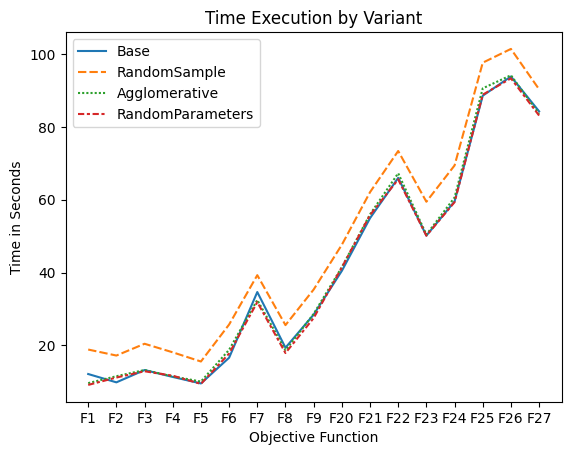

In [149]:
plot = sns.lineplot(data=TimeExecution)
plot.set_title('Time Execution by Variant')
plot.set_xlabel('Objective Function')
plot.set_ylabel('Time in Seconds');

In [154]:
TimeExecution[['Base','Agglomerative','RandomParameters']].T.describe().loc[['mean','std','50%']]

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F20,F21,F22,F23,F24,F25,F26,F27
mean,10.315164,10.860851,13.131501,11.505444,9.690919,17.724963,33.006499,18.645969,28.203140,41.120084,55.561919,66.281260,50.227897,59.819419,89.322762,93.773164,83.634306
std,1.604831,0.884534,0.195624,0.168925,0.341359,1.088709,1.459146,0.732484,0.606446,0.566774,0.557164,0.875763,0.160112,0.685043,1.093804,0.424463,0.579223
50%,9.645253,11.180574,13.242429,11.492209,9.559351,17.767607,32.476375,18.655575,28.447329,41.404047,55.769464,65.994904,50.147516,59.528865,88.830409,93.828094,83.541613


# Function 9

## Function Plot

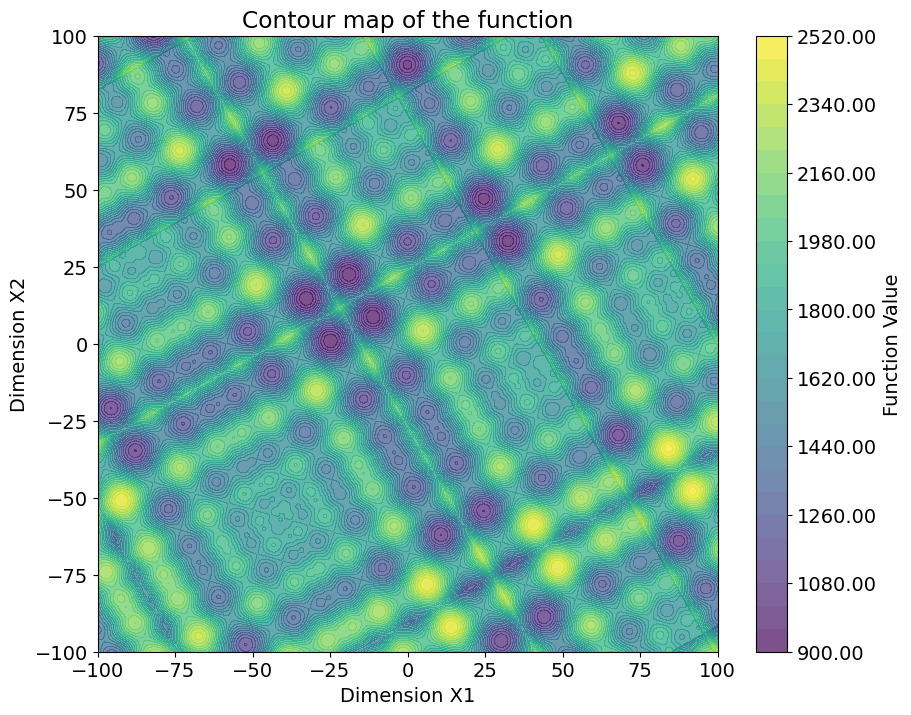

In [16]:
cec_based.F92017(ndim=2).plot_2d()

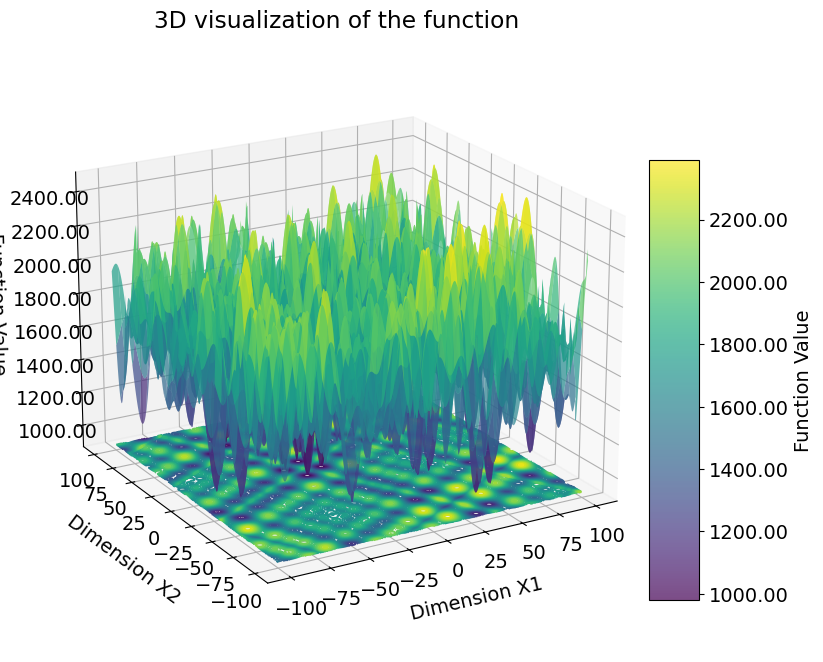

In [17]:
cec_based.F92017(ndim=2).plot_3d()

## Base

In [5]:
F9_Base = pd.read_csv('./Dim_2/Base/Optimals_F9.csv',index_col=None,header=None)
F9_Base.__name__ = 'F9 Base'

In [27]:
F9_Base.head(10)

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,1132.505601,933.774637,933.774637,933.774637,933.774637,933.774637,933.774637,933.774637,933.774637,933.774637,...,903.819502,903.819502,903.819502,903.819502,903.819502,903.819502,903.819502,903.819502,903.819502,903.819502
1,948.840393,948.840393,948.840393,948.840393,948.840393,947.888463,947.888463,947.888463,947.888463,947.888463,...,902.403941,902.403941,902.403941,902.403941,902.403941,902.403941,902.403941,902.403941,902.403941,902.403941
2,1125.011391,1125.011391,1100.315202,1030.499116,1030.499116,1029.827303,929.442612,929.442612,929.442612,929.442612,...,910.317473,910.317473,910.317473,910.317473,910.317473,910.317473,910.317473,910.317473,910.317473,910.317473
3,998.117018,998.117018,998.117018,973.210627,973.210627,973.210627,973.210627,973.210627,973.210627,973.210627,...,903.529482,903.529482,903.529482,903.529482,903.529482,903.529482,903.529482,903.529482,903.529482,903.529482
4,961.987637,961.987637,961.987637,961.987637,961.987637,961.987637,920.667239,920.667239,920.667239,920.667239,...,903.755899,903.755899,903.755899,903.755899,903.755899,903.755899,903.755899,903.755899,903.755899,901.762082
5,955.968214,912.285688,912.285688,912.285688,912.285688,912.285688,912.285688,912.285688,912.285688,912.285688,...,911.113142,911.113142,911.113142,911.113142,911.113142,911.113142,911.039504,911.039504,911.039504,911.039504
6,1043.658112,1043.658112,918.487992,918.487992,918.487992,918.487992,918.487992,918.487992,918.487992,905.074452,...,905.074452,905.074452,905.074452,905.074452,905.074452,905.074452,905.074452,905.074452,905.074452,905.074452
7,1101.495819,1101.495819,984.360244,984.360244,984.360244,984.360244,984.360244,984.360244,984.360244,966.075688,...,902.066367,902.066367,902.066367,902.066367,902.066367,902.066367,902.066367,902.066367,902.066367,902.066367
8,988.898689,988.898689,988.898689,971.787642,971.787642,948.069809,948.069809,948.069809,909.100872,909.100872,...,903.598687,903.598687,903.598687,903.598687,903.598687,903.598687,903.598687,903.598687,903.598687,903.598687
9,1012.542622,980.787206,980.787206,980.215462,980.215462,980.215462,980.215462,980.215462,920.325061,920.325061,...,901.796273,901.796273,901.796273,901.796273,901.796273,901.796273,901.796273,901.796273,901.796273,901.796273


In [28]:
F9_Base.tail(10)

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
990,971.155738,971.155738,971.155738,971.155738,971.155738,971.155738,947.315999,947.315999,947.315999,947.315999,...,901.992606,901.992606,901.992606,901.992606,901.992606,901.992606,901.992606,901.992606,901.992606,901.992606
991,960.999598,960.999598,960.999598,960.999598,960.999598,960.999598,960.999598,960.999598,960.999598,960.999598,...,917.502114,917.502114,916.964991,916.964991,916.964991,916.964991,911.384061,911.384061,911.384061,911.384061
992,1061.817373,914.816714,914.816714,914.816714,914.816714,914.816714,914.816714,914.816714,900.453463,900.453463,...,900.453463,900.453463,900.453463,900.453463,900.453463,900.453463,900.453463,900.453463,900.453463,900.453463
993,1081.289134,1049.558948,1049.558948,987.615413,987.615413,987.615413,987.615413,908.767865,908.767865,908.767865,...,907.975356,907.975356,907.975356,904.927838,904.927838,904.927838,904.927838,902.027794,902.027794,902.027794
994,1103.942521,1103.942521,1103.942521,1046.936469,1046.936469,1015.824346,1015.824346,984.710119,951.134213,951.134213,...,903.223578,903.223578,903.223578,903.223578,903.223578,903.223578,903.223578,903.223578,903.223578,903.223578
995,970.226622,970.226622,970.226622,970.226622,970.226622,970.226622,970.226622,970.226622,970.226622,970.226622,...,918.771823,918.771823,904.646839,904.646839,904.646839,904.646839,904.646839,904.646839,904.646839,904.646839
996,906.834169,906.834169,906.834169,906.834169,906.834169,906.834169,906.834169,906.834169,906.834169,906.061457,...,903.085027,903.085027,903.085027,903.085027,903.085027,903.085027,903.085027,903.085027,903.085027,903.085027
997,1063.390481,1010.412481,922.745207,922.745207,922.745207,922.745207,922.745207,922.745207,922.745207,922.745207,...,901.800964,901.800964,901.800964,901.800964,901.800964,901.800964,901.800964,901.800964,901.800964,901.800964
998,1022.354357,1022.354357,1022.354357,991.088861,991.088861,991.088861,991.088861,991.088861,991.088861,991.088861,...,916.030674,916.030674,903.655757,903.655757,903.655757,903.655757,903.655757,903.655757,903.655757,903.655757
999,986.162276,986.162276,986.162276,986.162276,986.162276,986.162276,986.162276,986.162276,986.162276,986.162276,...,916.808872,916.808872,916.808872,916.808872,916.808872,916.808872,916.808872,916.808872,912.434824,912.434824


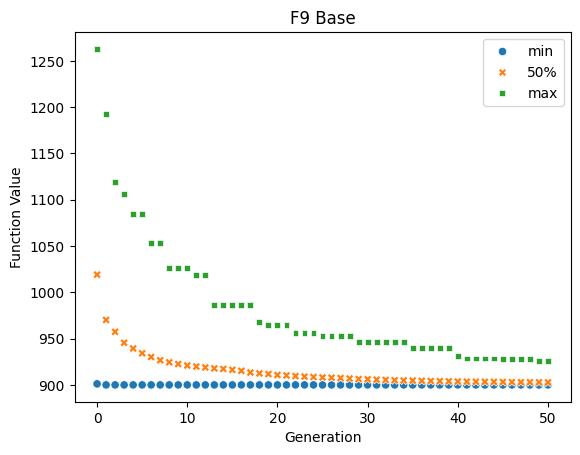

In [7]:
Plot_Min50Max(F9_Base)

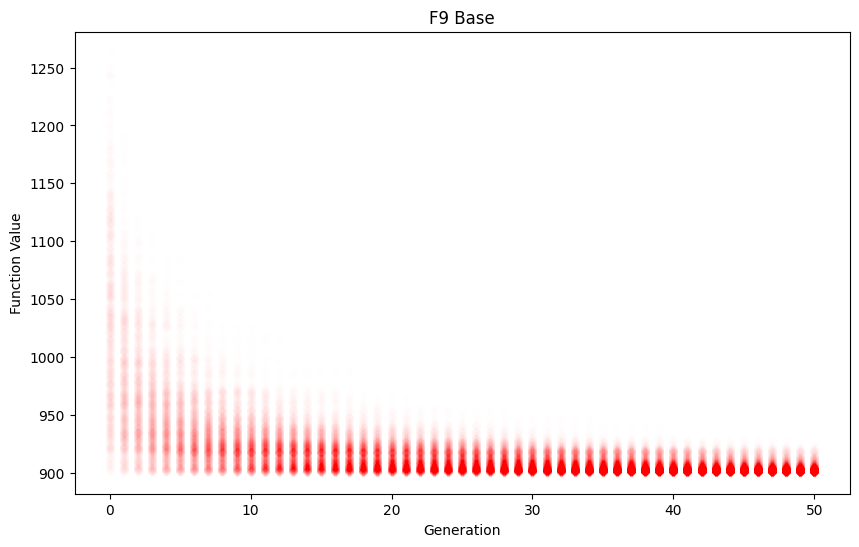

In [ ]:
Plot_Generation_FunctionValues(F9_Base)

In [9]:
PlotFunctionValues = InteractivePlot(F9_Base)
interact(PlotFunctionValues,generation=(0,50,1))

interactive(children=(IntSlider(value=25, description='generation', max=50), Output()), _dom_classes=('widget-…

<function __main__.InteractivePlot.<locals>.PlotFunctionValue(generation)>

## Random Sample

In [35]:
F9_RandomSample = pd.read_csv('./Dim_2/RandomSample/Optimals_F9.csv',index_col=None,header=None)
F9_RandomSample.__name__ = 'F9 Random Sample'

In [36]:
F9_RandomSample.head(10)

,0,1,2,3,4,5,6,7,8,9,...,116,117,118,119,120,121,122,123,124,125
0,1203.922828,1022.081577,980.464034,980.464034,980.464034,980.464034,980.464034,980.464034,980.464034,939.804597,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,972.928684,972.928684,972.928684,972.928684,972.928684,949.159203,949.159203,949.159203,943.134132,943.134132,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,927.040012,927.040012,927.040012,927.040012,923.472476,923.472476,923.472476,923.472476,923.472476,923.472476,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1011.810493,1000.091767,981.600672,981.600672,981.600672,939.030042,920.852262,920.852262,920.852262,920.852262,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,968.632764,963.063390,911.518520,911.518520,911.518520,911.518520,911.518520,911.518520,911.518520,911.518520,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,997.883522,969.307494,969.307494,922.827068,922.827068,922.827068,922.827068,922.827068,922.827068,922.827068,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,969.878194,969.878194,969.878194,969.878194,969.878194,969.878194,969.878194,969.878194,969.878194,969.365429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1053.467248,1053.467248,928.403282,928.403282,928.403282,928.403282,928.403282,928.403282,928.403282,928.403282,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,999.845474,936.449992,936.449992,933.877062,933.877062,933.877062,933.877062,933.877062,933.877062,933.877062,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1001.889997,977.336281,977.336281,977.336281,958.699243,958.699243,920.877198,920.877198,920.877198,920.877198,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
F9_RandomSample.tail(10)

,0,1,2,3,4,5,6,7,8,9,...,116,117,118,119,120,121,122,123,124,125
990,1045.576152,957.325557,914.641817,914.641817,914.641817,914.641817,914.641817,914.641817,914.641817,909.558761,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
991,1098.007078,1098.007078,1022.529627,927.035291,927.035291,927.035291,927.035291,927.035291,927.035291,927.035291,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
992,904.702234,904.702234,904.702234,904.702234,904.702234,904.702234,904.702234,904.702234,904.702234,904.702234,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
993,1045.352880,922.013863,909.530172,909.530172,909.530172,909.530172,909.530172,909.530172,909.530172,909.530172,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
994,1015.276439,934.709150,934.709150,934.709150,934.709150,928.752894,928.752894,928.752894,928.752894,928.752894,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,969.912698,969.912698,969.912698,955.501725,955.501725,925.262633,925.262633,925.262633,925.262633,925.262633,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,968.193892,968.193892,926.852769,926.852769,926.852769,926.852769,926.852769,926.852769,926.852769,926.852769,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,924.278061,924.278061,924.278061,924.278061,924.278061,924.278061,924.278061,924.278061,924.278061,924.278061,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,992.487461,992.487461,992.487461,992.487461,992.487461,992.487461,992.487461,992.339196,953.951587,953.951587,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
999,1262.354035,984.952699,984.952699,920.623382,920.623382,920.623382,920.623382,920.623382,920.623382,920.623382,...,900.312173,900.312173,900.312173,900.312173,900.312173,900.312173,900.312173,900.312173,900.312173,900.312173


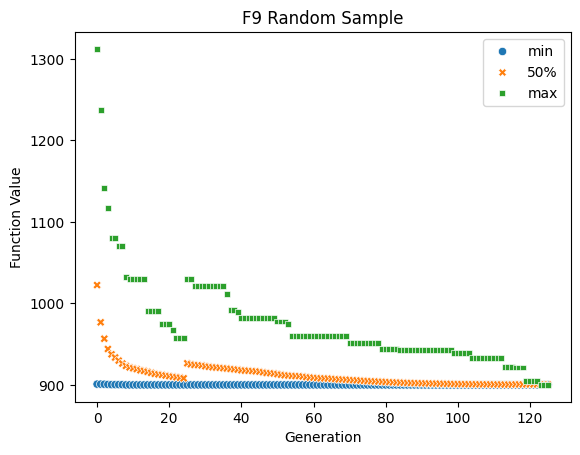

In [158]:
Plot_Min50Max(F9_RandomSample)

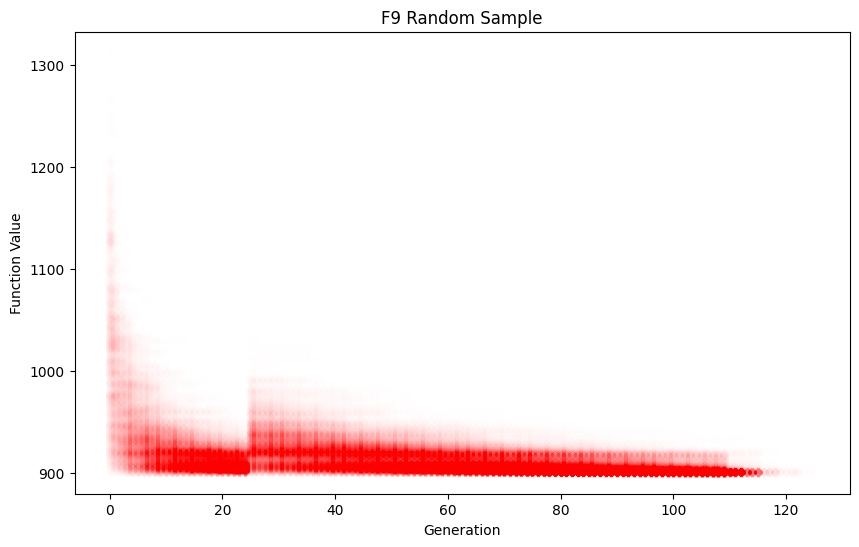

In [84]:
Plot_Generation_FunctionValues(F9_RandomSample)

In [85]:
PlotFunctionValues = InteractivePlot(F9_RandomSample)
interact(PlotFunctionValues,generation=(0,125,1))

interactive(children=(IntSlider(value=62, description='generation', max=125), Output()), _dom_classes=('widget…

<function __main__.InteractivePlot.<locals>.PlotFunctionValue(generation)>

## Agglomerative

In [86]:
F9_Agglomerative = pd.read_csv('./Dim_2/Agglomerative/Optimals_F9.csv',index_col=None,header=None)
F9_Agglomerative.__name__ = 'F9 Agglomerative'

In [87]:
F9_Agglomerative.head(10)

,0,1,2,3,4,5,6,7,8,9,...,184,185,186,187,188,189,190,191,192,193
0,926.680177,926.680177,926.680177,926.680177,906.761843,906.761843,906.761843,906.761843,906.761843,906.761843,...,900.000001,900.000001,900.000001,900.000001,900.000001,900.000001,900.000000,900.000000,900.000000,900.000000
1,922.188932,922.188932,922.188932,922.188932,922.188932,922.188932,922.188932,922.188932,922.188932,922.188932,...,901.137321,901.137321,901.137321,901.137321,901.137321,901.137321,901.137321,901.137321,901.137321,901.137321
2,1034.711927,1001.520647,1001.520647,1001.520647,936.887384,936.887384,936.887384,936.887384,936.887384,936.887384,...,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
3,1090.599393,906.774061,906.774061,906.774061,906.774061,906.774061,906.774061,906.774061,906.774061,906.774061,...,900.312173,900.312173,900.312173,900.312173,900.312173,900.312173,900.312173,900.312173,900.312173,900.312173
4,1012.580856,1012.580856,1012.580856,1012.580856,1012.580856,1012.580856,1012.580856,1012.580856,1012.580856,1012.580856,...,900.898677,900.898677,900.898677,900.779570,900.779570,900.779570,900.754891,900.671902,900.633516,900.633516
5,1007.643604,1007.643604,1007.643604,1002.578186,962.921116,962.921116,962.921116,962.921116,962.921116,919.297540,...,900.333848,900.192484,900.178000,900.178000,900.148453,900.110148,900.074743,900.065018,900.065018,900.065018
6,1061.157044,942.628480,942.628480,942.628480,942.628480,928.363589,928.363589,928.363589,928.363589,909.445207,...,900.312173,900.312173,900.312173,900.312173,900.312173,900.312173,900.312173,900.312173,900.312173,900.312173
7,1049.595360,1049.595360,1049.595360,1049.595360,1020.426060,1020.426060,1003.164201,1003.164201,1003.164201,1003.164201,...,900.329629,900.329571,900.329566,900.329505,900.329505,900.329505,900.329492,900.329492,900.329455,900.329412
8,1011.567447,976.817134,976.817134,938.623933,938.623933,938.623933,938.623933,938.623933,938.623933,938.623933,...,900.624347,900.624347,900.624347,900.624347,900.624347,900.624347,900.624347,900.624347,900.624347,900.624347
9,1018.123903,1018.123903,1018.123903,1016.001146,924.383066,924.383066,924.383066,924.383066,924.383066,924.383066,...,902.557526,902.557526,902.557526,902.557526,902.557526,902.557526,902.557526,902.557526,902.557526,902.557526


In [88]:
F9_Agglomerative.tail(10)

,0,1,2,3,4,5,6,7,8,9,...,184,185,186,187,188,189,190,191,192,193
990,987.860979,973.252194,973.252194,973.252194,973.252194,973.252194,973.252194,906.012718,906.012718,906.012718,...,900.312173,900.312173,900.312173,900.312173,900.312173,900.312173,900.312173,900.312173,900.312173,900.312173
991,1034.022047,932.535609,932.535609,932.535609,932.535609,932.535609,932.535609,932.535609,932.535609,932.535609,...,916.757225,916.757225,916.757225,916.757225,916.757225,916.757222,916.757222,916.757220,916.757220,916.757220
992,984.524432,984.524432,903.949218,903.949218,903.949218,903.949218,903.949218,903.949218,903.949218,903.949218,...,903.949218,903.949218,903.949218,903.949218,903.949218,903.949218,903.949218,903.949218,903.949218,903.949218
993,1117.036592,937.232860,937.232860,937.232860,937.232860,937.232860,937.232860,937.232860,937.232860,937.232860,...,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
994,1023.710335,1023.710335,1023.710335,1023.710335,955.721320,955.721320,920.243727,920.243727,920.243727,920.243727,...,900.624347,900.624347,900.624347,900.624347,900.624347,900.624347,900.624347,900.624347,900.624347,900.624347
995,1009.886699,912.229377,912.229377,908.032355,908.032355,908.032355,908.032355,908.032355,908.032355,908.032355,...,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
996,1094.994766,1015.524333,1015.524333,1015.524333,991.559731,983.364116,981.064881,942.827868,942.827868,942.827868,...,900.312173,900.312173,900.312173,900.312173,900.312173,900.312173,900.312173,900.312173,900.312173,900.312173
997,1096.826813,1096.826813,1093.900206,1093.900206,908.110088,908.110088,908.110088,908.110088,908.110088,908.110088,...,907.653217,907.653217,907.226694,907.226694,907.226694,907.226694,907.226694,907.226694,907.226694,907.226694
998,1139.309666,980.378211,980.378211,980.378211,953.627672,953.627672,953.627672,953.627672,953.627672,953.627672,...,900.624354,900.624353,900.624349,900.624347,900.624347,900.624347,900.624347,900.624347,900.624347,900.624347
999,940.477844,940.477844,940.477844,940.477844,940.477844,940.477844,928.666491,928.666491,928.666491,928.666491,...,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000


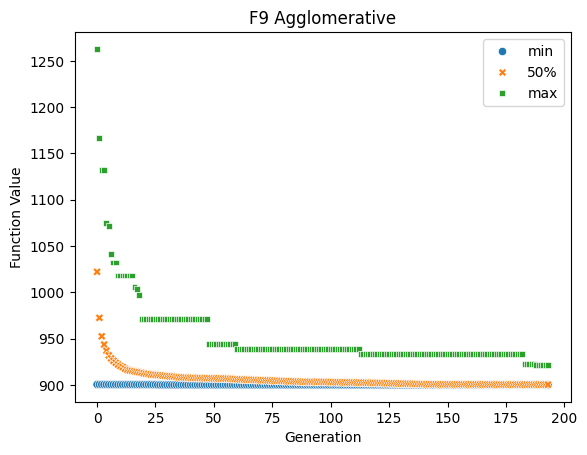

In [89]:
Plot_Min50Max(F9_Agglomerative)

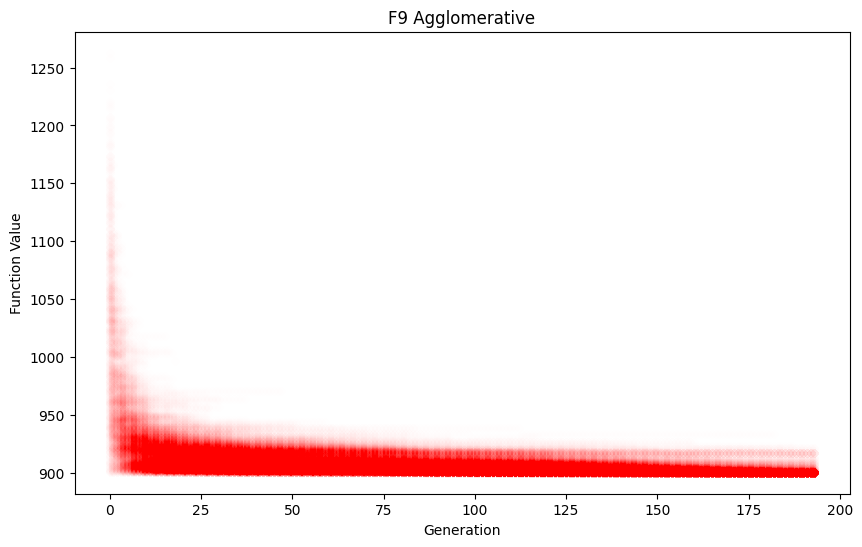

In [90]:
Plot_Generation_FunctionValues(F9_Agglomerative)

In [91]:
PlotFunctionValues = InteractivePlot(F9_Agglomerative)
interact(PlotFunctionValues,generation=(0,125,1))

interactive(children=(IntSlider(value=62, description='generation', max=125), Output()), _dom_classes=('widget…

<function __main__.InteractivePlot.<locals>.PlotFunctionValue(generation)>

## Random Parameters

In [100]:
F9_RandomParameters = pd.read_csv('./Dim_2/RandomParameters/Optimals_F9.csv',index_col=None,header=None)
F9_RandomParameters.__name__ = 'F9 Random Parameters'

In [101]:
F9_RandomParameters.head(10)

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,997.276127,997.276127,967.138090,967.138090,967.138090,967.138090,967.138090,967.138090,947.315778,947.315778,...,901.707050,901.707050,901.707050,901.707050,901.707050,901.707050,901.707050,901.707050,901.707050,901.707050
1,1041.133374,1041.133374,970.176234,970.176234,970.176234,970.176234,970.176234,970.176234,970.176234,970.176234,...,904.915137,904.915137,904.851186,904.851186,904.851186,904.851186,904.851186,904.851186,904.851186,904.851186
2,936.307781,936.307781,936.307781,936.307781,936.307781,936.307781,936.307781,936.307781,936.307781,936.307781,...,911.984282,911.984282,911.984282,911.984282,911.984282,911.984282,911.984282,911.984282,911.984282,911.919239
3,1140.997027,1140.997027,1046.977788,908.746227,908.746227,908.746227,908.746227,908.746227,908.746227,908.746227,...,908.746227,908.746227,904.857010,904.857010,904.857010,904.857010,904.857010,904.857010,904.857010,904.857010
4,1055.817988,1055.817988,1015.298281,1015.298281,926.173699,926.173699,926.173699,926.173699,926.173699,926.173699,...,912.317701,912.317701,901.068947,901.068947,901.068947,901.068947,901.068947,901.068947,901.068947,901.068947
5,1099.719379,1059.549379,1026.347907,1026.347907,926.614295,926.614295,926.614295,926.614295,926.614295,926.614295,...,901.507625,901.507625,901.507625,901.507625,901.507625,901.507625,901.507625,901.507625,901.507625,901.507625
6,934.543530,934.543530,934.543530,934.543530,934.543530,934.543530,934.543530,934.543530,930.235956,925.759394,...,900.752372,900.752372,900.752372,900.752372,900.752372,900.752372,900.752372,900.752372,900.752372,900.752372
7,924.640073,924.640073,924.640073,924.640073,924.640073,924.640073,924.640073,924.640073,924.640073,924.640073,...,918.052154,918.052154,918.052154,918.052154,918.052154,918.052154,918.052154,918.052154,918.052154,918.052154
8,1147.447615,946.981992,946.981992,946.981992,946.981992,946.981992,946.981992,946.981992,909.936711,909.936711,...,903.751270,903.751270,903.751270,903.751270,903.751270,903.751270,903.751270,903.751270,903.751270,903.751270
9,1148.995742,1086.951514,1030.605885,1030.605885,907.835291,907.835291,907.835291,907.835291,907.835291,907.835291,...,906.162520,906.162520,906.162520,906.162520,906.162520,906.162520,906.162520,906.162520,906.162520,906.162520


In [102]:
F9_RandomParameters.tail(10)

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
990,1163.203294,955.000089,955.000089,955.000089,955.000089,955.000089,955.000089,955.000089,955.000089,955.000089,...,902.608502,902.608502,902.608502,902.608502,902.608502,902.608502,902.608502,902.608502,902.608502,902.608502
991,1025.479745,906.045568,906.045568,903.927892,903.927892,903.927892,903.927892,903.927892,903.927892,903.927892,...,903.927892,903.927892,903.927892,903.927892,903.927892,903.927892,903.927892,903.927892,903.927892,903.927892
992,1120.139621,939.985519,939.985519,939.985519,939.985519,907.758113,907.758113,907.758113,907.758113,907.758113,...,903.327189,903.327189,903.327189,903.327189,903.327189,903.327189,903.327189,903.327189,903.327189,903.327189
993,1000.669786,1000.669786,1000.669786,1000.669786,1000.669786,1000.669786,953.558722,932.694829,932.694829,932.694829,...,910.890267,910.890267,910.890267,910.890267,910.890267,910.890267,910.890267,910.890267,910.890267,910.890267
994,937.044659,937.044659,937.044659,919.669037,919.669037,919.669037,919.669037,919.669037,919.669037,919.669037,...,919.669037,908.803223,908.803223,906.508885,906.508885,906.508885,906.508885,906.508885,906.508885,901.613740
995,945.331866,945.331866,945.331866,945.331866,945.331866,945.331866,945.331866,945.331866,945.331866,945.331866,...,904.010737,904.010737,904.010737,904.010737,904.010737,903.937200,903.937200,901.104118,901.104118,901.104118
996,1061.442588,944.912101,944.912101,944.912101,944.912101,944.912101,934.717191,934.717191,934.717191,934.717191,...,903.021104,903.021104,903.021104,903.021104,903.021104,903.021104,903.021104,903.021104,903.021104,903.021104
997,935.756685,935.756685,935.756685,935.756685,935.756685,935.756685,935.756685,935.756685,928.012318,928.012318,...,918.767300,918.767300,915.632268,910.717380,910.717380,910.131548,905.307432,905.307432,905.307432,905.307432
998,918.934809,918.934809,918.934809,918.934809,918.934809,918.934809,918.934809,918.934809,918.934809,918.934809,...,903.660577,903.660577,903.660577,903.660577,903.660577,903.660577,903.660577,903.660577,903.660577,903.660577
999,972.697864,972.697864,909.374887,909.374887,909.374887,909.374887,909.374887,909.374887,909.374887,909.374887,...,901.074222,901.074222,901.074222,901.074222,901.074222,901.074222,901.074222,901.074222,901.074222,901.074222


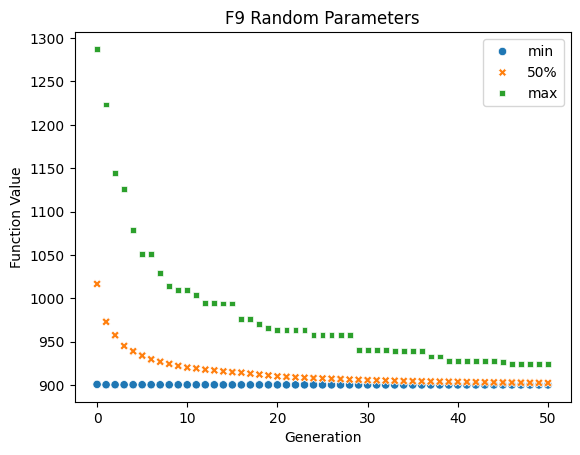

In [103]:
Plot_Min50Max(F9_RandomParameters)

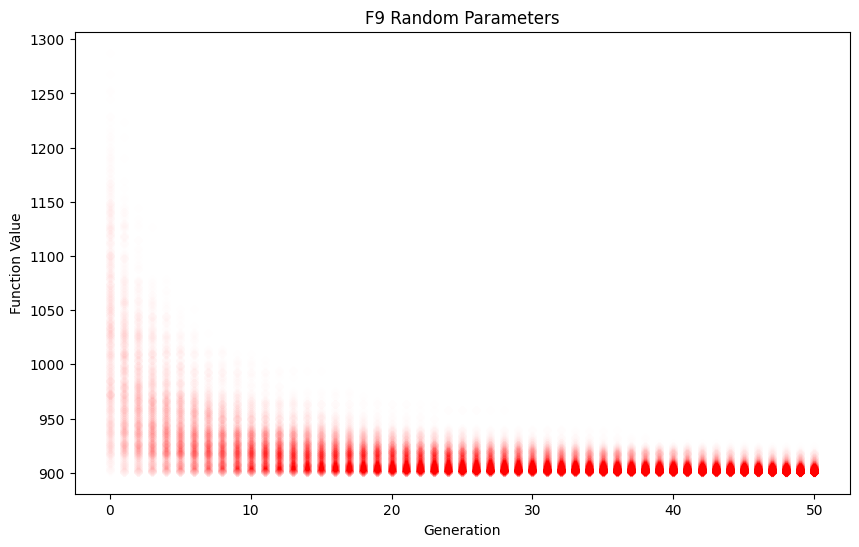

In [104]:
Plot_Generation_FunctionValues(F9_RandomParameters)

In [111]:
PlotFunctionValues = InteractivePlot(F9_RandomParameters)
interact(PlotFunctionValues,generation=(0,50,1))

interactive(children=(IntSlider(value=25, description='generation', max=50), Output()), _dom_classes=('widget-…

<function __main__.InteractivePlot.<locals>.PlotFunctionValue(generation)>